In [1]:
import numpy as np
import scipy.constants as C
from matplotlib.pyplot import figure, show, xlabel, ylabel, legend, ylim, xlim, title, yscale, xscale, errorbar

In [13]:
def conversion(T,lam,D=10,R_p=1,d=1):
    # A function to convert Brightness temperature to Flux density
    # T is the Brightness temperature in K
    # lam is the wavelength in microns
    # D is the distance to the planet in parsec
    # R_p is the radius of the explanet in R_earth
    # d is the distance between the exoplanet and its local star in AU
    
    c = C.c
    h = C.h
    kb = C.k
    
    print(c,h,kb)
    
    
    D = D*3.086e16         #convert to metres
    
    R_p = R_p*6.378e6        #convert to metres
    d = d*1.495978707e11   #convert to metres
    
    lam = lam*1e-6         #convert to metres
    
    I_mag = ((2*(1e-34)*(1e8)**2)/((1e-6)**5))*(1/(np.exp((1e-34)*(1e8)/((1e-23)*(1e2)*(1e-6)))-1))
    
    I = ((2*h*c**2)/(lam**5))*(1/(np.exp(h*c/(kb*T*lam))-1))
    omega = (np.pi*(R_p**2))/(D**2)
    
    
    F = I*omega
    F_mag = I_mag*omega
    print(I_mag)
    print(F_mag)
    
    F_photons = F*lam/(h*c)*10**(-6)
    F_photons_mag = F_mag*(1e-6)/((1e-34)*(1e8))*(1e-6)
    print(F_photons_mag)
    
    theta = 3600*(d/D)*(180/np.pi)
    
    
    return F_photons, theta


def Makegraph(lam,F,name=''):
    
    
    fig = figure()
    fr = fig.add_subplot(1,1,1)
    fr.plot(lam,F,label=name)
    xlabel('Wavelenght [microns]')
    ylabel('Flux [photon micron-1 m-2 s-1]')
    title(name)
    show()
    
def Blackbody(lam,T=288,R_p=1,D=10):
    
    lam = lam*1e-6
    
    c = C.c
    h = C.h
    kb = C.k
    
    D = D*3.086e16         #convert to metres
    R_p = R_p*6.378e6 
    
    BB = ((2*h*c**2)/(lam**5))*(1/(np.exp(h*c/(kb*T*lam))-1))
    omega = (np.pi*(R_p**2))/(D**2)
    
    F = BB*omega
    
    F_photons = F*lam/(h*c)*10**(-6)
    
    return F

In [14]:
UM1 = np.loadtxt("../Graph 1 AU/Ultramafic_1.csv",delimiter=',')

UM_F, UM_th = conversion(UM1[:,1],UM1[:,0],D=10,d=1)
UM_convert = np.transpose((UM1[:,0],UM_F))
#print(UM_th)
#print(UM_F)
#print(UM1[:,0])
np.savetxt('Ultra.txt',UM_convert, delimiter=' ')



299792458.0 6.62607015e-34 1.380649e-23
90803982.01937555
1.2185180114670526e-13
12.185180114670528


299792458.0 6.62607015e-34 1.380649e-23
90803982.01937555
1.3539089016300584e-12
135.39089016300585
0.3332985073980738


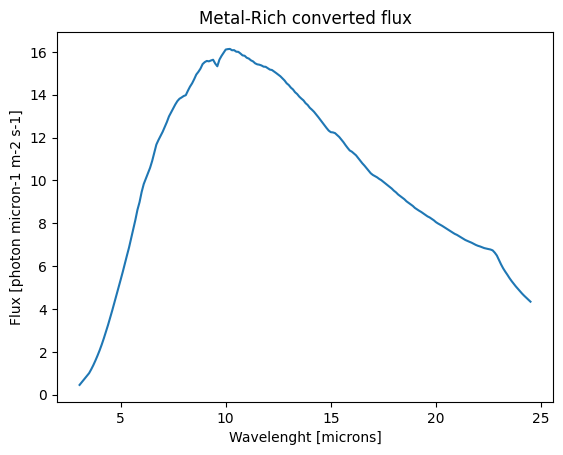

In [15]:
MR1 = np.loadtxt("../Graph 1 AU/Metal-Rich_1.csv",delimiter=',')

MR_F, MR_th = conversion(MR1[:,1],MR1[:,0],D=3,d=1)
MR_convert = np.transpose((MR1[:,0],MR_F))
print(MR_th)
#print(len(MR_F))
#print(MR1[:,0])
np.savetxt('Metal.txt',MR_convert, delimiter=' ')

Makegraph(MR1[:,0],MR_F,name='Metal-Rich converted flux')

299792458.0 6.62607015e-34 1.380649e-23
90803982.01937555
1.3539089016300584e-12
135.39089016300585
0.3332985073980738


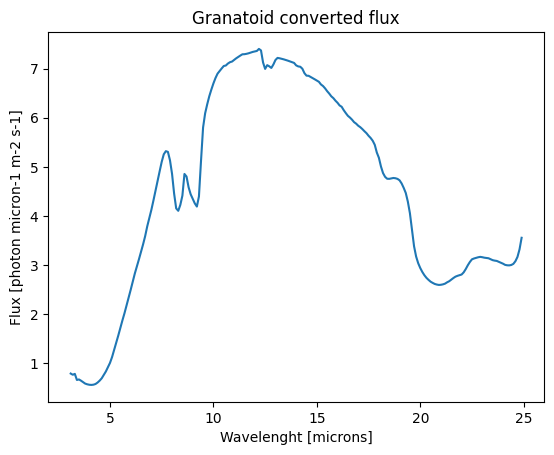

In [16]:
G1 = np.loadtxt("../Graph 1 AU/Granitoid_1.csv",delimiter=',')

G_F, G_th = conversion(G1[:,1],G1[:,0],D=3,d=1)
G_convert = np.transpose((G1[:,0],G_F))
print(G_th)
#print(G_F)
#print(G1[:,0])
np.savetxt('Granitoid.txt',G_convert, delimiter=' ')
Makegraph(G1[:,0],G_F,name='Granatoid converted flux')

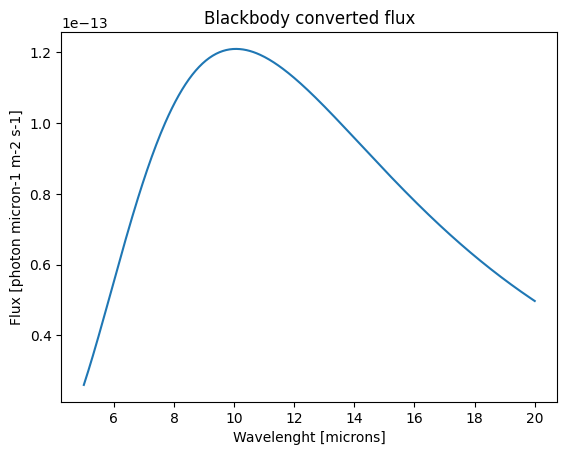

In [17]:
lam_BB =np.linspace(5,20,400)
F_BB = Blackbody(lam_BB,D=3)
BB_convert = np.transpose((lam_BB,F_BB))

np.savetxt('BB.txt',BB_convert, delimiter=' ')
Makegraph(lam_BB,F_BB,name='Blackbody converted flux')